In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read in datafile

In [2]:
#pd.set_option('display.max_columns', None)
df = pd.read_csv("rawJailDataIntern.csv")

In [3]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df)

,fips,facility_name,year,rated_capacity,total_confined_pop,adp,confined_women,confined_men,admissions_year,admissions_week,admissions_day,discharge_year,discharge_week,discharge_day
0,6059,ORANGE COUNTY SHERIFF'S DEPARTMENT,1985,1864.0,2844.0,2767.0,364,2476.0,93086.0,NaN,NaN,92834.0,NaN,NaN
1,6059,ORANGE COUNTY SHERIFF'S DEPARTMENT,1986,2496.0,3217.0,2913.0,375,2842.0,93998.0,NaN,NaN,93642.0,NaN,NaN
2,6059,ORANGE COUNTY SHERIFF'S DEPARTMENT,1987,2775.0,3471.0,3250.0,464,3006.0,77747.0,NaN,NaN,76685.0,NaN,NaN
3,6059,ORANGE COUNTY SHERIFF'S DEPARTMENT,1989,3478.0,4527.0,4281.0,585,3942.0,125325.0,NaN,NaN,122631.0,NaN,NaN
4,6059,ORANGE COUNTY SHERIFF'S DEPARTMENT,1990,3478.0,4402.0,4370.0,510,3892.0,92899.0,NaN,NaN,93416.0,NaN,NaN
5,6059,ORANGE COUNTY SHERIFF'S DEPARTMENT,1992,5289.0,4690.0,4688.0,495,4181.0,NaN,NaN,223.0,NaN,NaN,244.0
6,6059,ORANGE COUNTY SHERIFF'S DEPARTMENT,1994,3821.0,4987.0,4836.0,539,4434.0,NaN,NaN,NaN,NaN,NaN,NaN
7,6059,ORANGE COUNTY SHERIFF'S DEPARTMENT,1995,3821.0,5157.0,5074.0,620,4522.0,NaN,NaN,NaN,NaN,NaN,NaN
8,6059,ORANGE COUNTY SHERIFF'S DEPARTMENT,1996,3821.0,5326.0,5143.0,673,5068.0,NaN,NaN,NaN,NaN,NaN,NaN
9,6059,ORANGE COUNTY SHERIFF'S DEPARTMENT,1997,3821.0,5368.0,5246.0,716,4635.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# missing data
initial_missing_ay = df.admissions_year.isna().sum()
initial_missing_dy = df.discharge_year.isna().sum()


In [5]:
# interpolate missing admissions_year data based on admissions_week and admissions_day
df['admissions_year'] = np.where(df.admissions_year.isnull(), df.admissions_week * 52, df.admissions_year)
df['admissions_year'] = np.where(df.admissions_year.isnull(), df.admissions_day * 365, df.admissions_year)

# interpolate missing discharge_year data based on discharge_week and discharge_day
df['discharge_year'] = np.where(df.discharge_year.isnull(), df.discharge_week * 52, df.discharge_year)
df['discharge_year'] = np.where(df.discharge_year.isnull(), df.discharge_day * 365, df.discharge_year)

In [12]:
# missing data in admissions_year
print("There were ", initial_missing_ay, " initial missing values for admissions per year. Now, there are ", df.admissions_year.isna().sum(), " missing in that column.")
print("There were ", initial_missing_dy, " initial missing values for discharges per year. Now, there are ", df.discharge_year.isna().sum(), " missing in that column.")


There were  122  initial missing values for admissions per year. Now, there are  39  missing in that column.
There were  122  initial missing values for discharges per year. Now, there are  40  missing in that column.


# Make all admissions and discharge data comparable on the year level and drop weekly and daily data

In [7]:
# Select identifying columns and admissions/discharge counts for year
df = df[['fips', 'year', 'admissions_year', 'discharge_year']]

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df)

,fips,year,admissions_year,discharge_year
0,6059,1985,93086.0,92834.0
1,6059,1986,93998.0,93642.0
2,6059,1987,77747.0,76685.0
3,6059,1989,125325.0,122631.0
4,6059,1990,92899.0,93416.0
5,6059,1992,81395.0,89060.0
6,6059,1994,NaN,NaN
7,6059,1995,NaN,NaN
8,6059,1996,NaN,NaN
9,6059,1997,NaN,NaN


In [33]:
# Pivot to make admissions and discharge data comparable on the year level
admissions_plot = df.pivot(index='year', 
         columns='fips', 
         values=['admissions_year'])
admissions_plot

admissions_year                                                       \
fips           6059     12021     16003    18097   21007   21009    25005   
year                                                                        
1970             NaN      NaN       NaN      NaN     NaN     NaN      NaN   
1978             NaN      NaN     156.0      NaN     NaN     NaN      NaN   
1983             NaN      NaN     138.0      NaN  1230.0     NaN      NaN   
1985         93086.0  10595.0       NaN  12000.0     NaN     NaN   1605.0   
1986         93998.0  11483.0       NaN  13200.0     NaN     NaN   1804.0   
1987         77747.0   8098.0       NaN  11158.0     NaN     NaN   1975.0   
1988             NaN      NaN     119.0      NaN   345.0     NaN      NaN   
1989        125325.0  11121.0       NaN  11549.0     NaN     NaN   2085.0   
1990         92899.0  11212.0       NaN  11600.0     NaN     NaN   2439.0   
1991             NaN      NaN     272.0      NaN     NaN     NaN      NaN   
1992         81395.0   8395.0       NaN  41975.0     NaN     NaN   1825.0   
1993             NaN      NaN  364635.0      NaN   365.0     NaN      NaN   
1994             NaN      NaN       NaN      NaN     NaN     NaN      NaN   
1995             NaN      NaN       NaN      NaN     NaN     NaN      NaN   
1996             NaN      NaN       NaN      NaN     NaN     NaN      NaN   
1997             NaN      NaN       NaN      NaN     NaN     NaN      NaN   
1998         65468.0  11024.0       NaN  13000.0     NaN  3692.0   5304.0   
1999         57564.0  11752.0     468.0      NaN   728.0     NaN   1872.0   
2000         62608.0  15756.0       NaN      NaN     NaN  4368.0   7592.0   
2001         57356.0  12428.0       NaN   2340.0     NaN   832.0   6240.0   
2002         65312.0  15132.0       NaN  61100.0     NaN     NaN   7280.0   
2003         64532.0  19188.0       NaN  74100.0     NaN  2600.0   8320.0   
2004         77844.0   2548.0       NaN  90896.0     NaN  3016.0  29900.0   
2005         67392.0  22464.0     416.0      NaN   208.0     NaN   9308.0   
2006             NaN      NaN       NaN  60060.0     NaN  3640.0      NaN   
2007         59904.0  83460.0       NaN      NaN     NaN     NaN  18304.0   
2008         69784.0  17316.0       NaN      NaN     NaN     NaN   9984.0   
2009         62504.0  14768.0       NaN      NaN     NaN     NaN      NaN   
2010         60580.0  14716.0       NaN      NaN     NaN     NaN  13676.0   
2011         68328.0  10244.0       NaN      NaN     NaN     NaN  12792.0   
2012         68848.0   9152.0       NaN      NaN     NaN     NaN   7592.0   
2013         65988.0      NaN       NaN      NaN     NaN     NaN  12948.0   
2014         60632.0  10504.0       NaN      NaN     NaN     NaN   4576.0   
2015         54727.0  11263.0       NaN      NaN     NaN     NaN   6368.0   
2016         56293.0   9358.0       NaN      NaN     NaN     NaN      NaN   
2017         56265.0   8584.0       NaN      NaN     NaN     NaN      NaN   
2018         60918.0   8496.0       NaN      NaN     NaN     NaN      NaN   

                              
fips   45091   47141   56043  
year                          
1970     NaN     NaN     NaN  
1978     NaN  4420.0   156.0  
1983   208.0  2892.0   413.0  
1985     NaN     NaN     NaN  
1986     NaN     NaN     NaN  
1987     NaN     NaN     NaN  
1988   735.0  3000.0   543.0  
1989     NaN     NaN     NaN  
1990     NaN     NaN     NaN  
1991   903.0     NaN     NaN  
1992     NaN     NaN     NaN  
1993   730.0   730.0     NaN  
1994     NaN     NaN     NaN  
1995     NaN     NaN     NaN  
1996     NaN     NaN     NaN  
1997     NaN     NaN     NaN  
1998     NaN     NaN     NaN  
1999     NaN     NaN  1196.0  
2000     NaN     NaN     NaN  
2001     NaN     NaN     NaN  
2002     NaN     NaN     NaN  
2003     NaN     NaN     NaN  
2004     NaN     NaN     NaN  
2005  1456.0  8424.0     NaN  
2006     NaN     NaN     NaN  
2007     NaN  6344.0     NaN  
2008     NaN  7488.0     

In [36]:
# Plot Admissions_year
sns.set(rc={'figure.figsize':(11, 4)})
sns.lineplot(data=admissions_plot, x="year", y="admissions_year", hue="fips")

TypeError: 'int' object is not iterable

# Write code that identifies anomalies in the data (for example, depending on the spread of the data, we often use a 20-40% year over year change threshold to find anomalies, feel free to use this or your own way to find anomalies)

(-58204.57307478941, 109145.38557478941)


<AxesSubplot:>

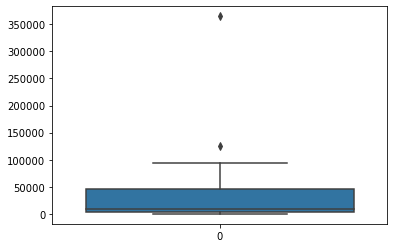

In [25]:
def find_bounds(data):
    """
    Based on a distribution, return upper and lower bounds (3 standard deviations from the mean or more).
    """
    anomalies = []
    
    mean = data.mean()
    std = data.std()
    
    lower_limit = mean - 2 * std
    upper_limit = mean + 2 * std
    
    return lower_limit, upper_limit

print(find_bounds(df['admissions_year']))

sns.boxplot(data=df['admissions_year'])

<AxesSubplot:>

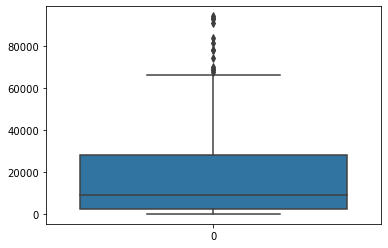

In [26]:
new_df = df.loc[df['admissions_year'] < find_bounds(df['admissions_year'])[1]]

sns.boxplot(data=new_df['admissions_year'])

[3649635.0]


<AxesSubplot:>

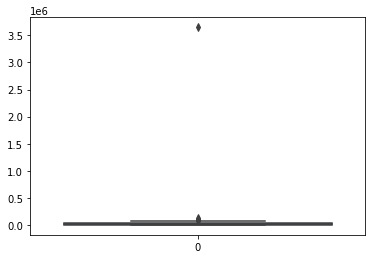

In [14]:
print(find_anomalies(df['discharge_year']))
sns.boxplot(data=df['discharge_year'])

In [10]:
def findAnomalies(df, colname):
    anomalies = []
    for (fips, year) in df.iteritems():
        print(year)
        
findAnomalies(df, 'admissions_year')

0       6059
1       6059
2       6059
3       6059
4       6059
       ...  
162    56043
163    56043
164    56043
165    56043
166    56043
Name: fips, Length: 167, dtype: int64
0      1985
1      1986
2      1987
3      1989
4      1990
       ... 
162    1978
163    1983
164    1988
165    1993
166    1999
Name: year, Length: 167, dtype: int64
0       93086.0
1       93998.0
2       77747.0
3      125325.0
4       92899.0
         ...   
162       156.0
163       413.0
164       543.0
165         NaN
166      1196.0
Name: admissions_year, Length: 167, dtype: float64
0       92834.0
1       93642.0
2       76685.0
3      122631.0
4       93416.0
         ...   
162       156.0
163       413.0
164       537.0
165         NaN
166       936.0
Name: discharge_year, Length: 167, dtype: float64


# Compare anomalous data to other columns or research the facility in order to understand if data should be omitted

# Interpolate all data points that were either originally missing or you decided should be omitted (by default we use linear interpolation but for some fields such as gender that add up to another field we might take that into account- there is no wrong way to do this we just want to see how you think)

# Write data to new file 

In [11]:
df.to_csv('cleaned.csv')